In [2]:
import matplotlib.pyplot as plt
import json
from preprocessing.paths import SCORES_FILE
from preprocessing.utils import retain_best_midi

**1\. Distribution of Confidence Scores**

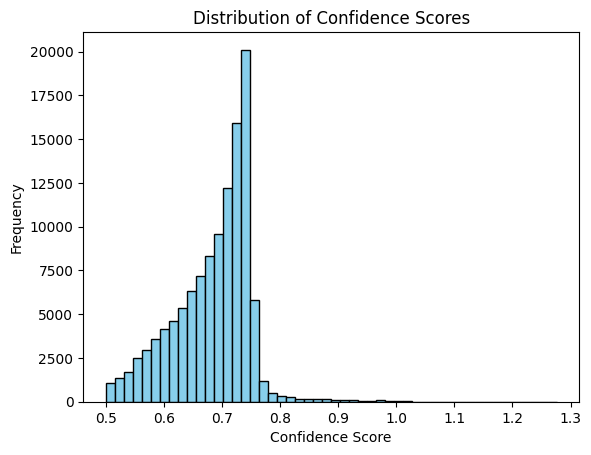

In [3]:
with open(SCORES_FILE) as f:
    scores = json.load(f)

# Flatten all confidence scores
all_scores = [
    score for midi_scores in scores.values() for score in midi_scores.values()
]

# Plot histogram
plt.hist(all_scores, bins=50, color="skyblue", edgecolor="black")
plt.title("Distribution of Confidence Scores")
plt.xlabel("Confidence Score")
plt.ylabel("Frequency")
plt.show()

**2\. Number of MIDI Matches per MSD ID**

MSD ID with the most matches (606 matches): ['TRJAJFZ128F427F224']


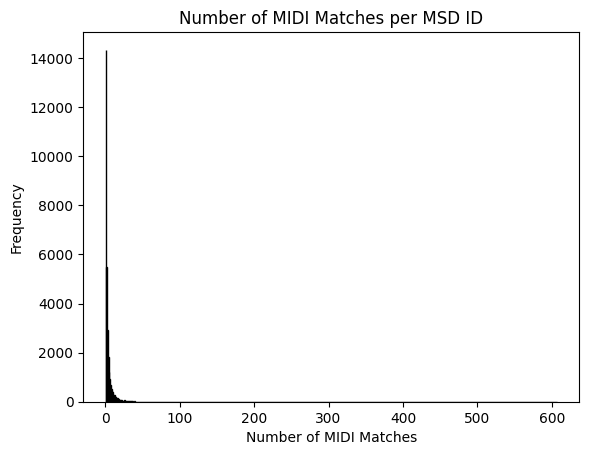

In [4]:
# Get the number of MIDI matches for each MSD ID
num_matches = [len(midi_scores) for midi_scores in scores.values()]

max_matches = max(num_matches)

msd_id_with_max_matches = [
    msd_id for msd_id, midi_scores in scores.items() if len(midi_scores) == max_matches
]
print(
    f"MSD ID with the most matches ({max_matches} matches): {msd_id_with_max_matches}"
)

# Plot histogram
plt.hist(
    num_matches,
    bins=range(1, max(num_matches) + 2),
    color="lightgreen",
    edgecolor="black",
    align="left",
)
plt.title("Number of MIDI Matches per MSD ID")
plt.xlabel("Number of MIDI Matches")
plt.ylabel("Frequency")
plt.show()

**3\. Distribution of Best Matches' Confidence Scores**

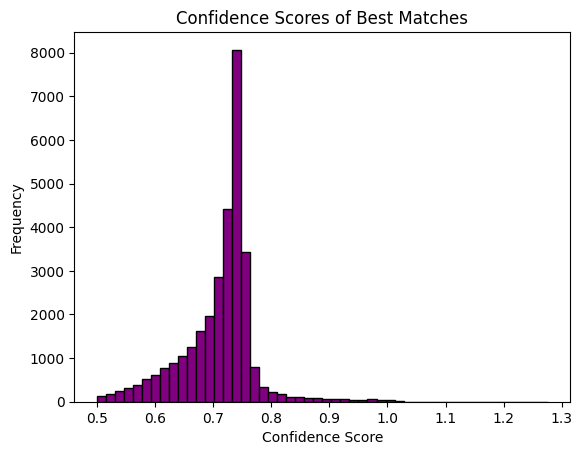

In [5]:

best_midi_files = retain_best_midi(scores)

# Extract the scores of the best matches
best_scores = [scores[msd_id][midi_md5] for msd_id, midi_md5 in best_midi_files.items()]

# Plot histogram
plt.hist(best_scores, bins=50, color="purple", edgecolor="black")
plt.title("Confidence Scores of Best Matches")
plt.xlabel("Confidence Score")
plt.ylabel("Frequency")
plt.show()

**4\. Relationship Between Number of Matches and Best Confidence Score**

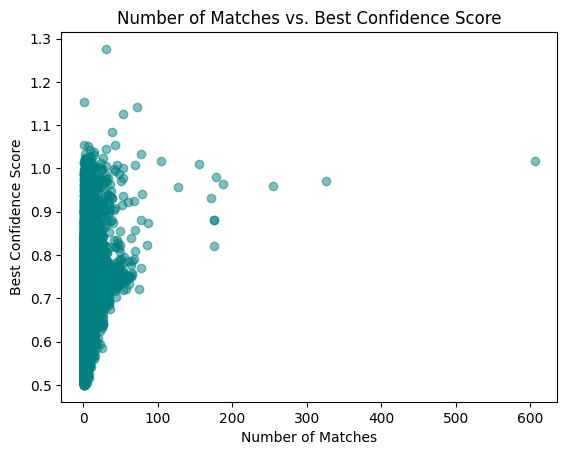

In [6]:
# Get data points
num_matches = [len(midi_scores) for midi_scores in scores.values()]
max_scores = [max(midi_scores.values()) for midi_scores in scores.values()]

# Plot scatter
plt.scatter(num_matches, max_scores, alpha=0.5, color="teal")
plt.title("Number of Matches vs. Best Confidence Score")
plt.xlabel("Number of Matches")
plt.ylabel("Best Confidence Score")
plt.show()